## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Reading the raw data

In [2]:
# Loading the Rg dataset
rg_data = pd.read_csv("D:/Chaitanya NML/Academic/Courses/Sem 2/Molecular Data Science and Informatics/End_sem/dataset_1.csv")
rg_data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Rg
0,1,1,1,1,1,1,1,1,1,1,...,2,2,1,2,2,1,2,1,2,4.70913
1,1,2,2,1,1,2,2,2,2,1,...,1,1,1,2,2,2,2,2,1,3.52856
2,1,2,1,2,1,1,2,1,2,1,...,2,2,1,2,2,2,1,2,1,3.78269
3,2,1,2,2,2,1,1,2,2,2,...,2,1,1,2,2,2,2,2,1,3.82037
4,1,2,1,1,1,1,2,2,2,2,...,1,1,1,2,1,2,1,1,1,3.46982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,1,1,2,2,2,2,1,1,2,1,...,1,1,1,1,2,2,2,1,1,3.34834
7872,1,2,2,1,2,2,2,1,2,2,...,2,1,1,2,2,1,2,2,2,3.84923
7873,1,2,2,2,2,1,1,1,2,1,...,2,1,2,1,2,2,1,1,1,4.18211
7874,1,2,2,1,2,1,2,1,2,2,...,2,1,2,1,2,2,2,1,1,4.34533


## Extracting input data (the sequence)

In [3]:
seq = rg_data.iloc[:,0:100]
seq

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,2,2,2,1,2,2,1,2,1,2
1,1,2,2,1,1,2,2,2,2,1,...,2,1,1,1,2,2,2,2,2,1
2,1,2,1,2,1,1,2,1,2,1,...,2,2,2,1,2,2,2,1,2,1
3,2,1,2,2,2,1,1,2,2,2,...,2,2,1,1,2,2,2,2,2,1
4,1,2,1,1,1,1,2,2,2,2,...,1,1,1,1,2,1,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7871,1,1,2,2,2,2,1,1,2,1,...,2,1,1,1,1,2,2,2,1,1
7872,1,2,2,1,2,2,2,1,2,2,...,2,2,1,1,2,2,1,2,2,2
7873,1,2,2,2,2,1,1,1,2,1,...,2,2,1,2,1,2,2,1,1,1
7874,1,2,2,1,2,1,2,1,2,2,...,2,2,1,2,1,2,2,2,1,1


## Extracting the output (the Rg)

In [4]:
radius = rg_data.iloc[:,100]
r = pd.DataFrame(radius)
r

,Rg
0,4.70913
1,3.52856
2,3.78269
3,3.82037
4,3.46982
...,...
7871,3.34834
7872,3.84923
7873,4.18211
7874,4.34533


## Splitting into training and testing data

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(seq, radius, test_size=0.2, random_state=30)

## Random Forest Regression

In [6]:
rf = RandomForestRegressor(n_estimators=100, random_state=30)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=30)

## Checking R2 score

In [7]:
from sklearn.metrics import r2_score
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9670923414645927

## Plotting parity diagram 

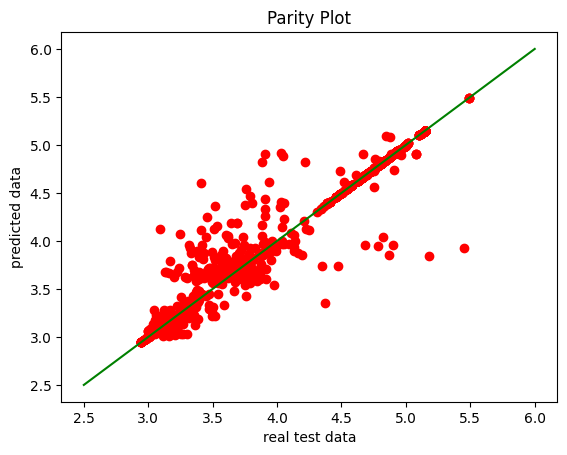

In [8]:
y = [2.5,6]
x = [2.5,6]
plt.scatter(y_test, y_pred, color='red')
plt.plot(x, y, color='green')
plt.xlabel('real test data')
plt.ylabel('predicted data')
plt.title('Parity Plot')
plt.show()